# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [5]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26389,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26390,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000076,NaN
26391,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26392,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_w = df.copy()
df_w = df_w[~df_w['AdjustedCompensation'].isna()]
df_w

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.000
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.800
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.400
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.900
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26185,Male,Other,56.0,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,50000.000
26195,Male,Germany,34.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195826,100449.384
26203,Male,United States,50.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,200000.000
26255,Male,Norway,32.0,Employed full-time,NaN,NaN,Yes,NaN,Data Analyst,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195826,89686.950


In [11]:
masters = df_w[df_w['FormalEducation'] == "Master's degree"]
bachelor = df_w[df_w['FormalEducation'] == "Bachelor's degree"]
print(masters['AdjustedCompensation'].describe())
print(bachelor['AdbjustedCompensation'].describe())

count    1.990000e+03
mean     6.913990e+04
std      1.355272e+05
min      0.000000e+00
25%      2.186800e+04
50%      5.381217e+04
75%      9.200000e+04
max      4.498900e+06
Name: AdjustedCompensation, dtype: float64
count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Count'>

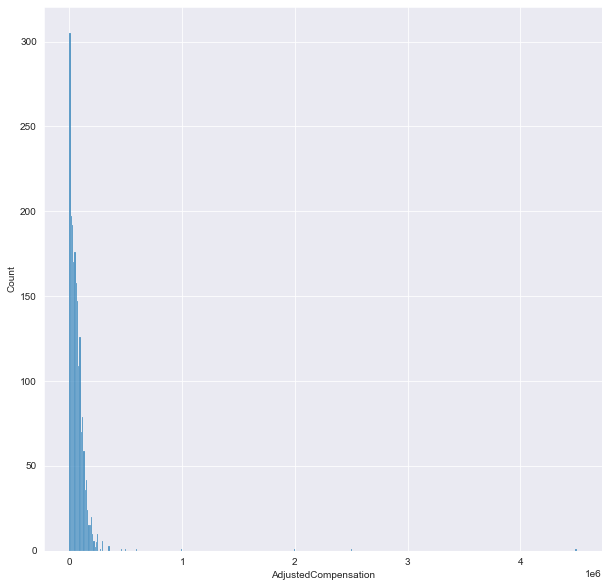

In [17]:
plt.figure(figsize=(10,10))
sns.histplot(masters['AdjustedCompensation'])

<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Count'>

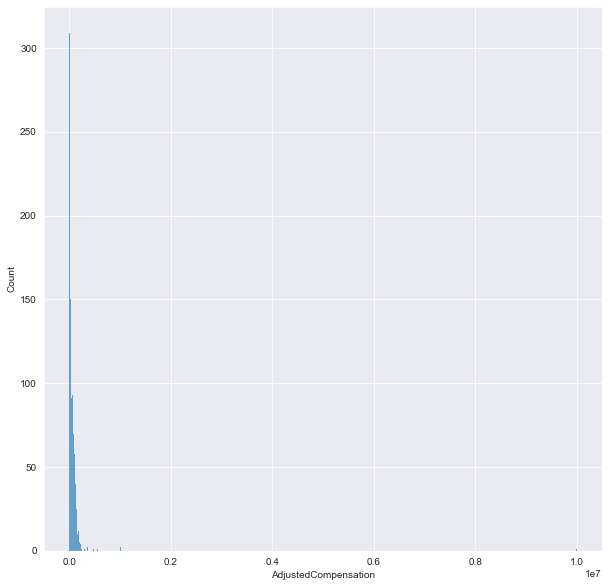

In [18]:
plt.figure(figsize=(10,10))
sns.histplot(bachelor['AdjustedCompensation'])

In [19]:
results = stats.ttest_ind(masters['AdjustedCompensation'], bachelor['AdjustedCompensation'], equal_var=False)
p = results[1]/2
p


0.33077639451272445

appears to be no significant difference in mean, but can see from graph there are outliers and 0 vlues in wage. Need to recalculate

In [20]:
m_o=masters.copy()
b_o=bachelor.copy()
m_o = m_o[(m_o['AdjustedCompensation'] > 1) & (m_o['AdjustedCompensation'] < 1000000)]
b_o = b_o[(b_o['AdjustedCompensation'] > 1) & (b_o['AdjustedCompensation'] < 1000000)]


In [21]:
m_o['AdjustedCompensation'].describe()

count      1959.000000
mean      65129.912088
std       56480.260820
min           1.092960
25%       23430.000000
50%       53812.170000
75%       92596.580000
max      595884.600000
Name: AdjustedCompensation, dtype: float64

In [22]:
b_o['AdjustedCompensation'].describe()

count      1090.000000
mean      54889.922517
std       57277.112056
min          27.314750
25%       11968.695000
50%       39050.000000
75%       80231.000000
max      550000.000000
Name: AdjustedCompensation, dtype: float64

In [25]:
a_results = stats.ttest_ind(m_o['AdjustedCompensation'], b_o['AdjustedCompensation'], equal_var=False)
a_p = a_results[1]/2
a_p

1.0571553664858006e-06

In [26]:
effect_size = (65129-54889)/57000
effect_size

0.17964912280701753

we see there enough eveidence to reject null that means are same, but the effect size is small

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [30]:
df_w['FormalEducation'].value_counts()

Master's degree                                                      1990
Bachelor's degree                                                    1107
Doctoral degree                                                       967
Professional degree                                                   130
Some college/university study without earning a bachelor's degree     111
I did not complete any formal education past high school               30
I prefer not to answer                                                  7
Name: FormalEducation, dtype: int64

In [34]:
#Your code here
dr = df_w[df_w['FormalEducation'] =='Doctoral degree']
dr['AdjustedCompensation'].describe()

count    9.670000e+02
mean     2.956618e+07
std      9.099981e+08
min     -7.351631e+01
25%      4.000000e+04
50%      7.413192e+04
75%      1.200000e+05
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [36]:
d_results = stats.ttest_ind(masters['AdjustedCompensation'], dr['AdjustedCompensation'], equal_var=False)
d_p = d_results[1]/2
d_p

0.1568586731186882

In [37]:
d_o= dr.copy()
d_o = d_o[(d_o['AdjustedCompensation'] > 1) & (d_o['AdjustedCompensation'] < 1000000)]

In [38]:
da_results = stats.ttest_ind(m_o['AdjustedCompensation'], d_o['AdjustedCompensation'], equal_var=False)
da_p = da_results[1]/2
da_p

2.7269125396946566e-18

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [41]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "AdjustedCompensation ~ C(FormalEducation)"
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [45]:
temp = df[df['AdjustedCompensation'] <= 1000000]

formula = "AdjustedCompensation ~ C(FormalEducation)"
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.483281e+11     6.0  21.003871  2.053970e-24
Residual            1.882681e+13  4327.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!